In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
print("Q2.1 Subscibers of magazine were studied as described below")
df_0201 = pd.DataFrame({
    'Interval' : [pd.Interval(left=i, right=i+10, closed='right') for i in range(20, 70, 10)],
    'Subscribers' : [1420, 2500, 1590, 850, 325]
})
print(df_0201)

Q2.1 Subscibers of magazine were studied as described below
   Interval  Subscribers
0  (20, 30]         1420
1  (30, 40]         2500
2  (40, 50]         1590
3  (50, 60]          850
4  (60, 70]          325


In [3]:
print("Distribution of Age Interval, Subscribers, Relative Frequency, Cumulative Relative Frequency are listed as follows")
total_subscriber = sum(df_0201['Subscribers'])
df_0201['Relative Frequency'] = [i / total_subscriber for i in df_0201['Subscribers']] 
df_0201['Cumulative Relative Frequency'] = [sum(df_0201['Relative Frequency'][:i + 1]) for i in range(len(df_0201['Relative Frequency']))]
#df_0201.loc['Total', "Subscribers"] = df_0201["Subscribers"].sum()
#df_0201.loc['Total', "Relative Frequency"] = df_0201["Relative Frequency"].sum()
#df_0201.loc['Total', "Cumulative Relative Frequency"] = np.nan
df_0201

Distribution of Age Interval, Subscribers, Relative Frequency, Cumulative Relative Frequency are listed as follows


,Interval,Subscribers,Relative Frequency,Cumulative Relative Frequency
0,"(20, 30]",1420,0.212416,0.212416
1,"(30, 40]",2500,0.373972,0.586387
2,"(40, 50]",1590,0.237846,0.824233
3,"(50, 60]",850,0.127150,0.951384
4,"(60, 70]",325,0.048616,1.000000


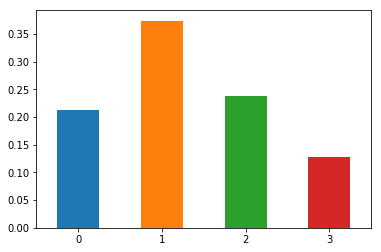

In [4]:
df_0201["Relative Frequency"][:-1].plot(kind='bar', rot=0)

In [5]:
print("Q2.2 Weight loss of diet program are as follows. Show mean, variance, standard deviation")
df_0202 = pd.Series([5, 10, 7, 1, 9])
print(df_0202)
print("Mean {}, Variance {}, Standard Deviation {}".format(
    round(df_0202.mean(), 2),round(df_0202.var(), 2), round(df_0202.std(), 2)
))

Q2.2 Weight loss of diet program are as follows. Show mean, variance, standard deviation
0     5
1    10
2     7
3     1
4     9
dtype: int64
Mean 6.4, Variance 12.8, Standard Deviation 3.58


In [6]:
print("Q2.3 Promoted employee's scores are followed. Find mean, median, variance, standard deviation, range, quartiles")
promotion_score = [
    75, 55, 86, 76, 67, 95, 68, 79, 71, 75,
    80, 83, 70, 61, 66, 77, 82, 74, 80, 80,
    56, 75, 62, 67, 72, 85, 91, 80, 75, 88
]
df_0203 = pd.Series(promotion_score)
print("Mean {}, Median {}, Variance {}, Standard Deviation {}, Range {}".format(
    df_0203.mean(), df_0203.median(), df_0203.var(),
    df_0203.std(), max(df_0203) - min(df_0203)
))

Q2.3 Promoted employee's scores are followed. Find mean, median, variance, standard deviation, range, quartiles
Mean 75.03333333333333, Median 75.0, Variance 93.61954022988506, Standard Deviation 9.67571910660314, Range 40


In [7]:
print("Q2.4 Find frequency distribution and mean, variance, standard deviation from it")
df_0204 = df_0203.to_frame()

range_0204 = max(promotion_score) - min(promotion_score)
interval_n = 1 + int(math.log(range_0204, 2))
interval_g = math.ceil(range_0204 / interval_n)
df_0204 = pd.DataFrame({
    'Interval' : [pd.Interval(
        left=min(promotion_score) + interval_g * i - 0.5,
        right=min(promotion_score) + interval_g * (i + 1) - 0.5,
        closed='right'
    ) for i in range(interval_n)],
    'Scores' : [0 for i in range(interval_n)]
})

for pro_s in promotion_score:
    for i in range(len(df_0204['Interval'])):
        if pro_s in df_0204['Interval'][i]:
            df_0204.at[i, 'Scores'] += 1
            break

print("(1) Frequency Distribution")
print(df_0204)
print("(2) mean, variance, standard deviation")
t_s = sum(df_0204['Scores'])
d_f = t_s - 1
mean = sum([i.mid * s for i,s in zip(df_0204['Interval'], df_0204['Scores'])]) / t_s 
var = sum([((i.mid - mean)**2) * s for i,s in zip(df_0204['Interval'], df_0204['Scores'])]) / d_f 
std = var**0.5
print("Mean {}, Variance {}, Standard Deviation {}".format(mean, var, std))

Q2.4 Find frequency distribution and mean, variance, standard deviation from it
(1) Frequency Distribution
       Interval  Scores
0  (54.5, 61.5]       3
1  (61.5, 68.5]       5
2  (68.5, 75.5]       8
3  (75.5, 82.5]       8
4  (82.5, 89.5]       4
5  (89.5, 96.5]       2
(2) mean, variance, standard deviation
Mean 74.56666666666666, Variance 92.87471264367817, Standard Deviation 9.63715272493272


In [8]:
print("Q2.5 Find mean, variance, standard deviation age of Q2.1")
df_0205 = df_0201.copy()
t_s = sum(df_0205['Subscribers'])
d_f = t_s - 1
mean = sum([i.mid * s for i,s in zip(df_0205['Interval'], df_0205['Subscribers'])]) / t_s 
var = sum([((i.mid - mean)**2) * s for i,s in zip(df_0205['Interval'], df_0205['Subscribers'])]) / d_f 
std = var**0.5
print("Mean {}, Variance {}, Standard Deviation {}".format(mean, var, std))

Q2.5 Find mean, variance, standard deviation age of Q2.1
Mean 39.25579655946148, Variance 121.54736503341127, Standard Deviation 11.024852154718959


In [9]:
print("Q2.6 There are 4000 people in Semiconductor dept, 6000 in Home appliance dept. Salary of each dept is 4500, 3700.")
print("Find average salary of last year") 
df_0206 = pd.DataFrame({
    'Dept' : ['SemiConductor', 'Home Appliance'],
    'Employee' : [4000, 6000],
    'Salary' : [4500, 3700]
})
t_s = sum(df_0206['Employee'])
mean = sum([e * s for e,s in zip(df_0206['Employee'], df_0206['Salary'])]) / t_s
print("Mean {}".format(mean))

Q2.6 There are 4000 people in Semiconductor dept, 6000 in Home appliance dept. Salary of each dept is 4500, 3700.
Find average salary of last year
Mean 4020.0


In [10]:
print("Q2.10 Scores of five students are listed below")
df_0209 = pd.Series([5, 7, 4, 3, 6])
print("Mean {}, Standard Deviation {}".format(df_0209.mean(), df_0209.std()))

Q2.10 Scores of five students are listed below
Mean 5.0, Standard Deviation 1.5811388300841898


In [11]:
df_0209 *= 10
print("If translate perfect score to 100, Mean {}, Standard Deviation {}".format(df_0209.mean(), df_0209.std()))

If translate perfect score to 100, Mean 50.0, Standard Deviation 15.811388300841896


In [12]:
df_0209 += 20
print("If add 20 each student's score, Mean {}, Standard Deviation {}".format(df_0209.mean(), df_0209.std()))

If add 20 each student's score, Mean 70.0, Standard Deviation 15.811388300841896


In [13]:
print("Q2.12 z-score")
df_0212 = pd.Series([18, 20, 17, 24, 21])
mean = df_0212.mean()
std = df_0212.std()
df_0212 = (df_0212 - mean) / std
print(df_0212)
print("z-score's Mean {}, Variance {}, Standard Deviation {}".format(df_0212.mean(), df_0212.var(), df_0212.std()))

Q2.12 z-score
0   -0.730297
1    0.000000
2   -1.095445
3    1.460593
4    0.365148
dtype: float64
z-score's Mean 0.0, Variance 0.9999999999999998, Standard Deviation 0.9999999999999999


Q2.14 Observation of X, Y is listed below
Covariance
      X     Y
X  2.50  2.75
Y  2.75  4.30
Correlation Coefficient
          X         Y
X  1.000000  0.838742
Y  0.838742  1.000000


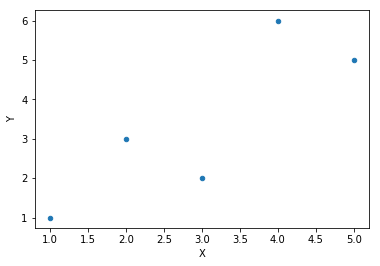

In [28]:
print('Q2.14 Observation of X, Y is listed below')
df_0214 = pd.DataFrame({
    'X' : [1,2,3,4,5],
    'Y' : [1,3,2,6,5]
})
df_0214.plot(kind='scatter', x='X', y='Y')
print("Covariance")
print(df_0214.cov())
print("Correlation Coefficient")
print(df_0214.corr())

Q2.15 Pracice time(X), absent(Y) are listed below
Covariance
     X    Y
X  5.3 -4.9
Y -4.9  5.7
Correlation Coefficient
          X         Y
X  1.000000 -0.891499
Y -0.891499  1.000000


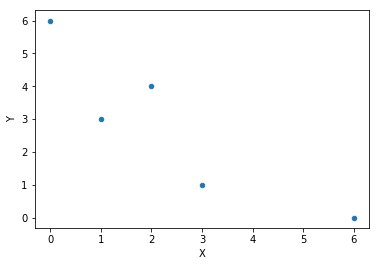

In [30]:
print("Q2.15 Pracice time(X), absent(Y) are listed below")
df_0215 = pd.DataFrame({
    'X' : [3,2,6,0,1],
    'Y' : [1,4,0,6,3]
})
df_0215.plot(kind='scatter', x='X', y='Y')
print("Covariance")
print(df_0215.cov())
print("Correlation Coefficient")
print(df_0215.corr())